In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
champs = pd.read_json('data/champion-9.2.1.json')
champs = pd.Series([0] * len(champs.index), index=champs.index.map(lambda x: x.lower()))
competitive = pd.read_csv('data/competitive-matches/matchinfo.csv')
competitive.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [2]:
blue1 = competitive[['Year','blueTopChamp', 'blueJungleChamp', 'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp', 'bResult','gamelength']]
red1 = competitive[['Year','redTopChamp', 'redJungleChamp', 'redMiddleChamp', 'redADCChamp', 'redSupportChamp', 'rResult','gamelength']]
blue1.columns = ('year','top', 'jungle', 'middle', 'adc', 'support', 'win','gamelength')
blue1=blue1.loc[blue1['win'] == 1]
red1.columns = ('year','top', 'jungle', 'middle', 'adc', 'support', 'win','gamelength')
red1=red1.loc[red1['win'] == 1]
competitive = pd.concat([red1, blue1], axis=0).reset_index(drop=True)
competitive.head()

,year,top,jungle,middle,adc,support,win,gamelength
0,2015,Irelia,JarvanIV,Azir,Corki,Annie,1,38
1,2015,Gnar,Nunu,Lulu,KogMaw,Janna,1,41
2,2015,Gnar,JarvanIV,Lulu,Corki,Thresh,1,24
3,2015,Kassadin,Vi,Zed,Corki,Morgana,1,41
4,2015,Sion,JarvanIV,Cassiopeia,Kalista,Blitzcrank,1,31


In [3]:
competitive_2018=competitive.loc[competitive['year'] == 2018]


In [4]:
competitive_2018.sort_values("gamelength", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_35796\2357146167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  competitive_2018.sort_values("gamelength", inplace=True)


In [5]:
competitive_2018.head()

,year,top,jungle,middle,adc,support,win,gamelength
3472,2018,Gangplank,Evelynn,Malzahar,Ezreal,Taric,1,24
3377,2018,Gnar,JarvanIV,Leblanc,Xayah,TahmKench,1,24
3334,2018,Gragas,RekSai,Syndra,Tristana,Braum,1,24
7613,2018,Camille,Sejuani,Taliyah,Kalista,Alistar,1,24
7560,2018,Jayce,Zac,Taliyah,Xayah,Thresh,1,24


After we found the gamelength, we would like to see what are the outliers, we can do so by using a box plot

<AxesSubplot:xlabel='gamelength'>

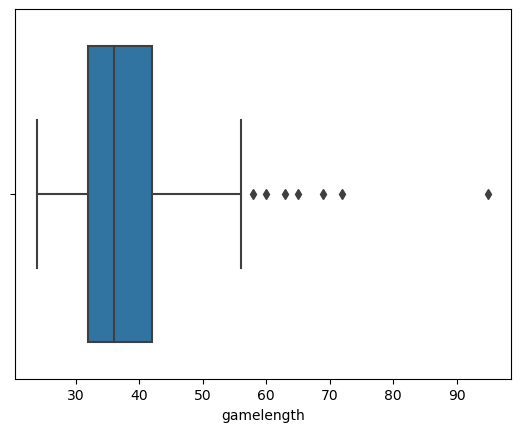

In [6]:
sns.boxplot(x=competitive_2018['gamelength'])

As we can see, games that went above 55-57min would be consider as outlier, and the max outlier is 95 min in a game ! What about the mean. median ?

In [7]:
competitive.gamelength.describe()

count    7620.000000
mean       37.012598
std         7.983238
min        17.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        95.000000
Name: gamelength, dtype: float64

Now, we can sort the team comps base on the game length, there are 3 types: Early(<=31min), Mid(>=31 & <=41) and Late (>41)

In [8]:
def classify_gamelength(length):
    if length <= 31:
        return 0
    elif length <= 41 :
        return 1
    else:
        return 2

In [9]:
competitive_2018['gamelength'] = competitive_2018['gamelength'].apply(classify_gamelength)


C:\Users\User\AppData\Local\Temp\ipykernel_35796\4255382298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  competitive_2018['gamelength'] = competitive_2018['gamelength'].apply(classify_gamelength)


In [10]:
#competitive['gamelength'] = competitive['gamelength'].apply(classify_gamelength)
competitive_2018.loc[competitive_2018['gamelength'] == 1]

,year,top,jungle,middle,adc,support,win,gamelength
7537,2018,Jax,Sejuani,Taliyah,Tristana,Taric,1,1
3450,2018,Gnar,Zac,Galio,Ezreal,Alistar,1,1
7577,2018,Gnar,Sejuani,Zoe,KogMaw,TahmKench,1,1
7346,2018,Camille,Zac,Taliyah,Tristana,Shen,1,1
3436,2018,Vladimir,Gragas,Ryze,Varus,TahmKench,1,1
...,...,...,...,...,...,...,...,...
7609,2018,Camille,Sejuani,Taliyah,Kalista,Taric,1,1
7466,2018,Gnar,JarvanIV,Cassiopeia,Tristana,Bard,1,1
3216,2018,Gangplank,Gragas,Azir,Caitlyn,TahmKench,1,1
7567,2018,Ornn,LeeSin,Azir,KogMaw,TahmKench,1,1


In [11]:
competitive_Early=competitive_2018.loc[competitive_2018['gamelength'] == 0 ]
competitive_Early.head()

,year,top,jungle,middle,adc,support,win,gamelength
3472,2018,Gangplank,Evelynn,Malzahar,Ezreal,Taric,1,0
3377,2018,Gnar,JarvanIV,Leblanc,Xayah,TahmKench,1,0
3334,2018,Gragas,RekSai,Syndra,Tristana,Braum,1,0
7613,2018,Camille,Sejuani,Taliyah,Kalista,Alistar,1,0
7560,2018,Jayce,Zac,Taliyah,Xayah,Thresh,1,0


In [12]:
competitive_Mid=competitive_2018.loc[competitive_2018['gamelength'] == 1]
competitive_Mid.head()

,year,top,jungle,middle,adc,support,win,gamelength
7537,2018,Jax,Sejuani,Taliyah,Tristana,Taric,1,1
3450,2018,Gnar,Zac,Galio,Ezreal,Alistar,1,1
7577,2018,Gnar,Sejuani,Zoe,KogMaw,TahmKench,1,1
7346,2018,Camille,Zac,Taliyah,Tristana,Shen,1,1
3436,2018,Vladimir,Gragas,Ryze,Varus,TahmKench,1,1


As for the late game team comp, we realie that all the outliers are from late game and in order to make sure about the accuracy, we might want to ignore the outliers, thus, lets give it a condition : >41 & <= 56

In [13]:
competitive_Late = competitive_2018.loc[competitive_2018['gamelength'] == 2 ]
competitive_Late.head()

,year,top,jungle,middle,adc,support,win,gamelength
7534,2018,Shen,JarvanIV,Karma,KogMaw,Janna,1,2
3465,2018,Gangplank,JarvanIV,Zoe,Caitlyn,Alistar,1,2
7536,2018,Maokai,Sejuani,Karma,KogMaw,Lulu,1,2
3449,2018,Ornn,Khazix,Ryze,Sivir,TahmKench,1,2
3441,2018,Lucian,Zac,Ryze,Caitlyn,Braum,1,2


In [14]:
freq = pd.DataFrame(np.zeros((143,143), dtype=np.int32), index=champs.index, columns=champs.index)

for index, row in competitive_Early.iterrows():
    for i in ['top','jungle','middle','adc','support']:
        ind = row[i].lower()
        freq.loc[ind, row['top'].lower()] += 1
        freq.loc[ind, row['jungle'].lower()] += 1
        freq.loc[ind, row['middle'].lower()] += 1
        freq.loc[ind, row['adc'].lower()] += 1
        freq.loc[ind, row['support'].lower()] += 1

pd.options.display.max_columns = None
pd.options.display.max_rows = None
freq

,aatrox,ahri,akali,alistar,amumu,anivia,annie,ashe,aurelionsol,azir,bard,blitzcrank,brand,braum,caitlyn,camille,cassiopeia,chogath,corki,darius,diana,drmundo,draven,ekko,elise,evelynn,ezreal,fiddlesticks,fiora,fizz,galio,gangplank,garen,gnar,gragas,graves,hecarim,heimerdinger,illaoi,irelia,ivern,janna,jarvaniv,jax,jayce,jhin,jinx,kaisa,kalista,karma,karthus,kassadin,katarina,kayle,kayn,kennen,khazix,kindred,kled,kogmaw,leblanc,leesin,leona,lissandra,lucian,lulu,lux,malphite,malzahar,maokai,masteryi,missfortune,monkeyking,mordekaiser,morgana,nami,nasus,nautilus,neeko,nidalee,nocturne,nunu,olaf,orianna,ornn,pantheon,poppy,pyke,quinn,rakan,rammus,reksai,renekton,rengar,riven,rumble,ryze,sejuani,shaco,shen,shyvana,singed,sion,sivir,skarner,sona,soraka,swain,sylas,syndra,tahmkench,taliyah,talon,taric,teemo,thresh,tristana,trundle,tryndamere,twistedfate,twitch,udyr,urgot,varus,vayne,veigar,velkoz,vi,viktor,vladimir,volibear,warwick,xayah,xerath,xinzhao,yasuo,yorick,zac,zed,ziggs,zilean,zoe,zyra
aatrox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ahri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
akali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alistar,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,2,0,0,0,2,0,0,3,4,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0,0,0,0
amumu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anivia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
annie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ashe,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aurelionsol,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
azir,0,0,0,0,0,0,0,1,0,9,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


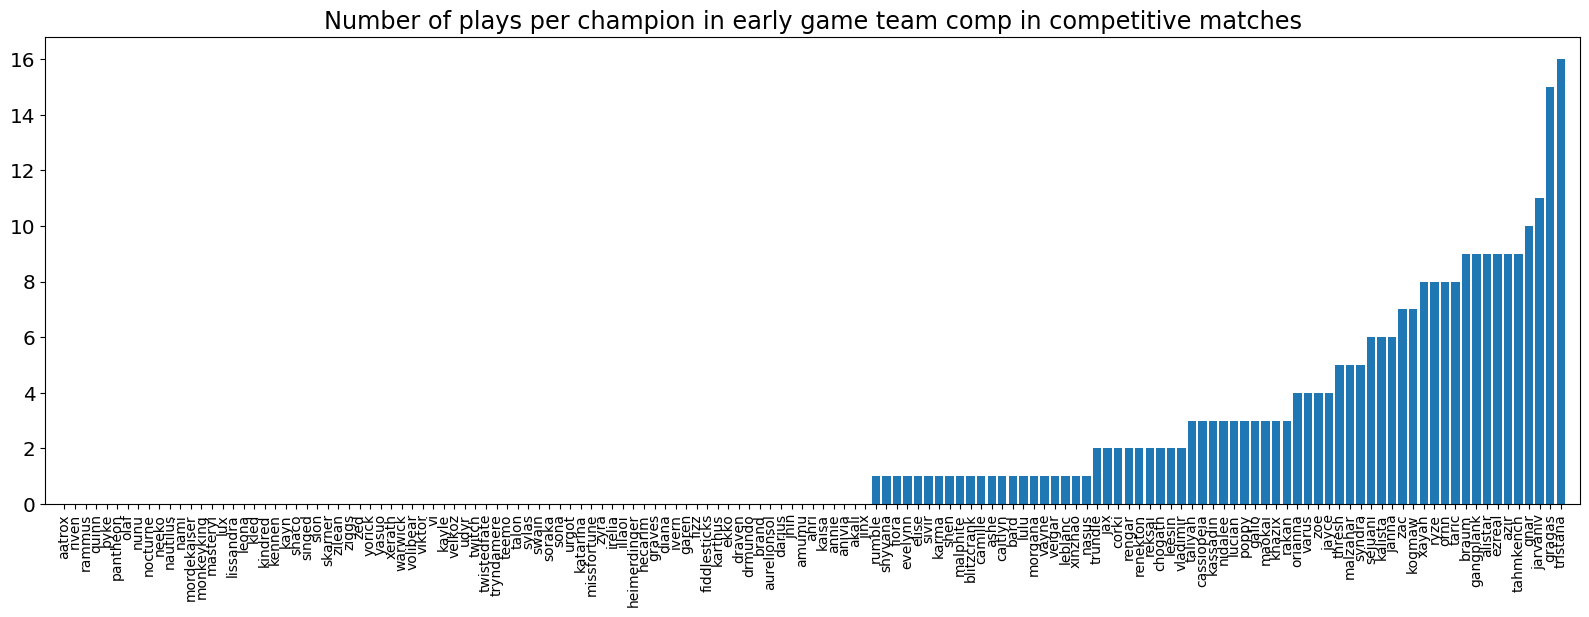

In [15]:
c = 0
def select(series):
    global c
    f = series.iloc[c]
    c += 1
    return f

num_plays = freq.apply(select, axis=1).sort_values()

with mpl.rc_context(rc={'ytick.labelsize':'x-large','figure.figsize':(16,6),'axes.titlesize':'xx-large', 'axes.xmargin': 0.01}):
    plt.bar(num_plays.index, num_plays)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.title('Number of plays per champion in early game team comp in competitive matches')
    plt.show()


In [16]:
freq_Mid = pd.DataFrame(np.zeros((143,143), dtype=np.int32), index=champs.index, columns=champs.index)

for index, row in competitive_Mid.iterrows():
    for i in ['top','jungle','middle','adc','support']:
        ind = row[i].lower()
        freq_Mid.loc[ind, row['top'].lower()] += 1
        freq_Mid.loc[ind, row['jungle'].lower()] += 1
        freq_Mid.loc[ind, row['middle'].lower()] += 1
        freq_Mid.loc[ind, row['adc'].lower()] += 1
        freq_Mid.loc[ind, row['support'].lower()] += 1

pd.options.display.max_columns = None
pd.options.display.max_rows = None
freq_Mid

,aatrox,ahri,akali,alistar,amumu,anivia,annie,ashe,aurelionsol,azir,bard,blitzcrank,brand,braum,caitlyn,camille,cassiopeia,chogath,corki,darius,diana,drmundo,draven,ekko,elise,evelynn,ezreal,fiddlesticks,fiora,fizz,galio,gangplank,garen,gnar,gragas,graves,hecarim,heimerdinger,illaoi,irelia,ivern,janna,jarvaniv,jax,jayce,jhin,jinx,kaisa,kalista,karma,karthus,kassadin,katarina,kayle,kayn,kennen,khazix,kindred,kled,kogmaw,leblanc,leesin,leona,lissandra,lucian,lulu,lux,malphite,malzahar,maokai,masteryi,missfortune,monkeyking,mordekaiser,morgana,nami,nasus,nautilus,neeko,nidalee,nocturne,nunu,olaf,orianna,ornn,pantheon,poppy,pyke,quinn,rakan,rammus,reksai,renekton,rengar,riven,rumble,ryze,sejuani,shaco,shen,shyvana,singed,sion,sivir,skarner,sona,soraka,swain,sylas,syndra,tahmkench,taliyah,talon,taric,teemo,thresh,tristana,trundle,tryndamere,twistedfate,twitch,udyr,urgot,varus,vayne,veigar,velkoz,vi,viktor,vladimir,volibear,warwick,xayah,xerath,xinzhao,yasuo,yorick,zac,zed,ziggs,zilean,zoe,zyra
aatrox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ahri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
akali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alistar,0,0,0,12,0,0,0,0,0,2,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,6,0,0,0,1,3,0,6,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0
amumu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anivia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
annie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ashe,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aurelionsol,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
azir,0,0,0,2,0,0,0,0,0,24,0,0,0,10,2,1,0,1,0,0,0,0,0,0,0,1,8,0,0,0,0,5,0,4,1,0,0,0,1,0,0,0,5,2,0,0,0,0,2,0,0,0,0,0,0,0,5,0,0,3,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9,0,0,0,0,2,0,0,0,1,0,0,0,3,0,2,1,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,3,0,0,0,0,0,0,3,1,0,0,0,0,2,0,0,2,0,1,0,0,2,0,0,0,0,0


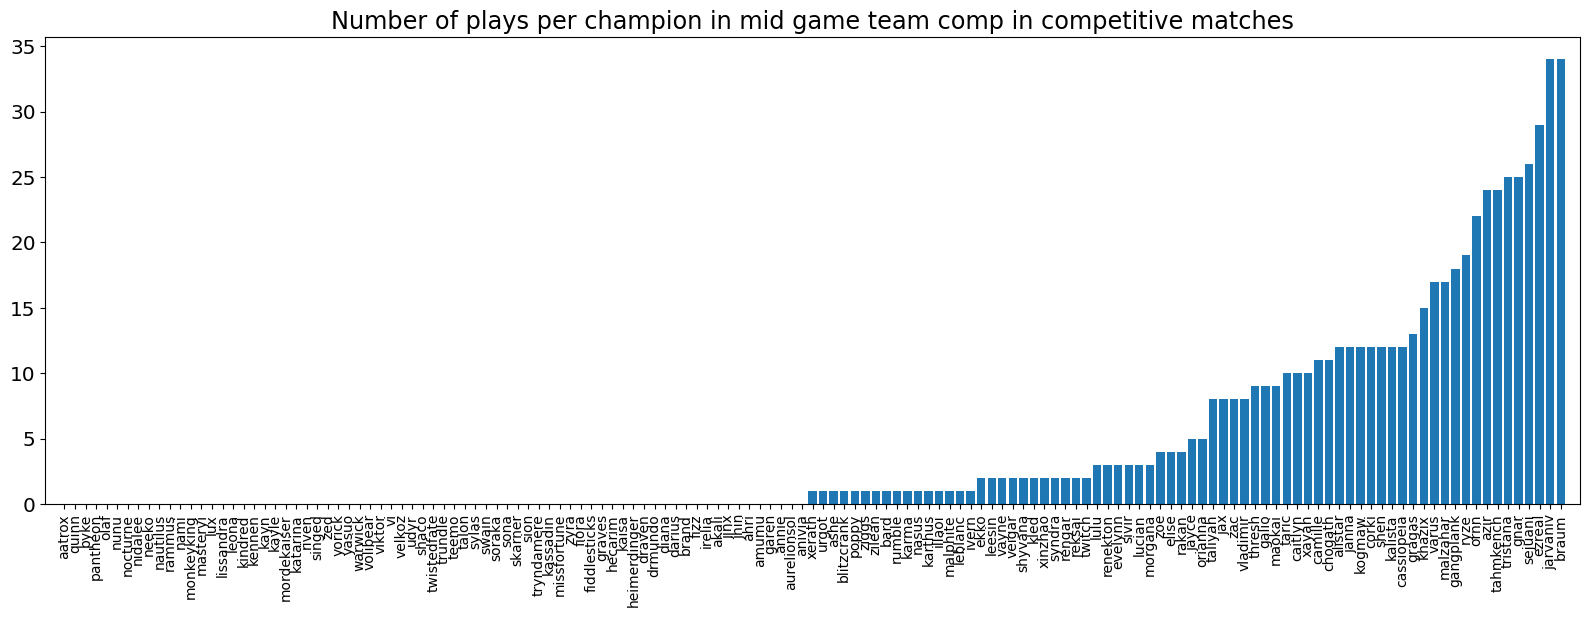

In [17]:
c = 0
def select(series):
    global c
    f = series.iloc[c]
    c += 1
    return f

num_plays = freq_Mid.apply(select, axis=1).sort_values()

with mpl.rc_context(rc={'ytick.labelsize':'x-large','figure.figsize':(16,6),'axes.titlesize':'xx-large', 'axes.xmargin': 0.01}):
    plt.bar(num_plays.index, num_plays)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.title('Number of plays per champion in mid game team comp in competitive matches')
    plt.show()

In [18]:
freq_Late = pd.DataFrame(np.zeros((143,143), dtype=np.int32), index=champs.index, columns=champs.index)

for index, row in competitive_Late.iterrows():
    for i in ['top','jungle','middle','adc','support']:
        ind = row[i].lower()
        freq_Late.loc[ind, row['top'].lower()] += 1
        freq_Late.loc[ind, row['jungle'].lower()] += 1
        freq_Late.loc[ind, row['middle'].lower()] += 1
        freq_Late.loc[ind, row['adc'].lower()] += 1
        freq_Late.loc[ind, row['support'].lower()] += 1

pd.options.display.max_columns = None
pd.options.display.max_rows = None
freq_Late

,aatrox,ahri,akali,alistar,amumu,anivia,annie,ashe,aurelionsol,azir,bard,blitzcrank,brand,braum,caitlyn,camille,cassiopeia,chogath,corki,darius,diana,drmundo,draven,ekko,elise,evelynn,ezreal,fiddlesticks,fiora,fizz,galio,gangplank,garen,gnar,gragas,graves,hecarim,heimerdinger,illaoi,irelia,ivern,janna,jarvaniv,jax,jayce,jhin,jinx,kaisa,kalista,karma,karthus,kassadin,katarina,kayle,kayn,kennen,khazix,kindred,kled,kogmaw,leblanc,leesin,leona,lissandra,lucian,lulu,lux,malphite,malzahar,maokai,masteryi,missfortune,monkeyking,mordekaiser,morgana,nami,nasus,nautilus,neeko,nidalee,nocturne,nunu,olaf,orianna,ornn,pantheon,poppy,pyke,quinn,rakan,rammus,reksai,renekton,rengar,riven,rumble,ryze,sejuani,shaco,shen,shyvana,singed,sion,sivir,skarner,sona,soraka,swain,sylas,syndra,tahmkench,taliyah,talon,taric,teemo,thresh,tristana,trundle,tryndamere,twistedfate,twitch,udyr,urgot,varus,vayne,veigar,velkoz,vi,viktor,vladimir,volibear,warwick,xayah,xerath,xinzhao,yasuo,yorick,zac,zed,ziggs,zilean,zoe,zyra
aatrox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ahri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
akali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alistar,0,0,0,6,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,3,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,3,0
amumu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anivia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
annie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ashe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aurelionsol,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
azir,0,0,0,1,0,0,0,0,0,14,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,3,0,0,0,0,2,0,5,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,2,1,0,0,0,0,0,6,0,0,1,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0


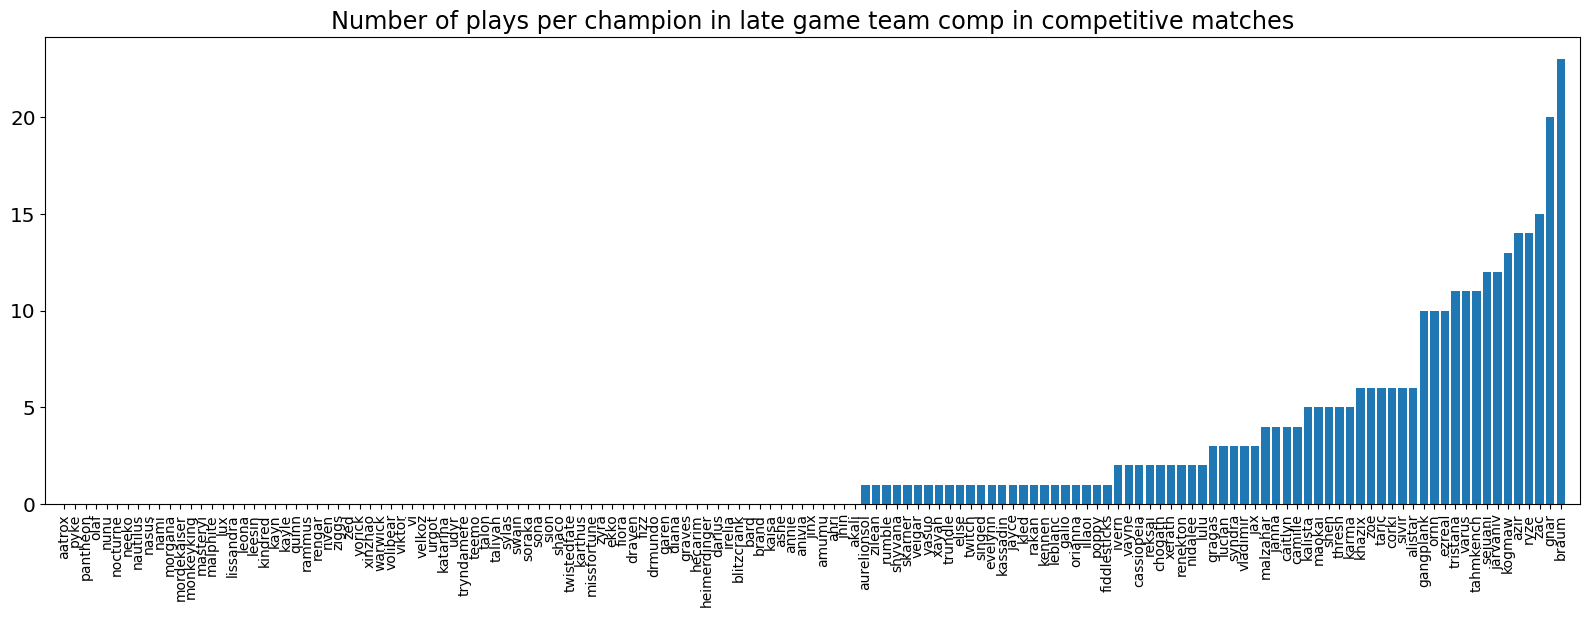

In [19]:
c = 0
def select(series):
    global c
    f = series.iloc[c]
    c += 1
    return f

num_plays = freq_Late.apply(select, axis=1).sort_values()

with mpl.rc_context(rc={'ytick.labelsize':'x-large','figure.figsize':(16,6),'axes.titlesize':'xx-large', 'axes.xmargin': 0.01}):
    plt.bar(num_plays.index, num_plays)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.title('Number of plays per champion in late game team comp in competitive matches')
    plt.show()

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [39]:
from sklearn.model_selection import train_test_split , StratifiedKFold, KFold, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn import metrics
from itertools import chain
from collections import Counter

In [40]:
competitve2018_comp = competitive_2018.drop(columns=['year','win','gamelength'])
competitve2018_comp.head()

,top,jungle,middle,adc,support
3472,Gangplank,Evelynn,Malzahar,Ezreal,Taric
3377,Gnar,JarvanIV,Leblanc,Xayah,TahmKench
3334,Gragas,RekSai,Syndra,Tristana,Braum
7613,Camille,Sejuani,Taliyah,Kalista,Alistar
7560,Jayce,Zac,Taliyah,Xayah,Thresh


In [41]:
competitve2018_comp.shape

(241, 5)

In [42]:
heros = list(set(one for one in chain.from_iterable([row for _, row in competitve2018_comp.iterrows()])))
len(heros)

82

In [43]:
def fun(row):
    new_row = np.zeros(241)
    new_row[heros.index(row[0])] = 1
    new_row[heros.index(row[1])] = 1
    new_row[heros.index(row[2])] = 1
    new_row[heros.index(row[3])] = 1
    new_row[heros.index(row[4])] = 1
    return new_row


In [44]:
X = []
X = list(fun(row) for _, row in competitve2018_comp.iterrows())
X

[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [45]:
y =list( competitive_2018['gamelength'])
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [46]:
X_train,Y_train,X1_test,Y1_test=train_test_split(X,y,test_size=0.20)

In [47]:
from sklearn.model_selection import cross_val_score

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, X1_test)
Y_pred = sgd.predict(Y_train)
expected=Y1_test

acc_sgd = round(sgd.score(Y_train,Y1_test) * 100, 2)
acc_sgd1= round(sgd.score(X_train, X1_test) * 100, 2)
scores = cross_val_score(sgd, X, y, cv=10, scoring = "accuracy")
sgdCv=scores.mean()
sgdSD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.36       0.25       0.54166667 0.375      0.375      0.5
 0.45833333 0.29166667 0.41666667 0.45833333]
Mean: 0.4026666666666666
Standard Deviation: 0.08612071631017577


In [48]:
from sklearn.model_selection import cross_val_score

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, X1_test)

Y_prediction = random_forest.predict(Y_train)
expected=Y1_test

acc_random_forest = round(random_forest.score(Y_train, Y1_test) * 100, 2)
acc_random_forest1= round(random_forest.score(X_train, X1_test) * 100, 2)
#Cross validation score , using 10 fold
# RandomForest

scores = cross_val_score(random_forest, X, y, cv=10, scoring = "accuracy")

rfCv=scores.mean()
rfSD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.48       0.5        0.625      0.41666667 0.54166667 0.625
 0.41666667 0.375      0.5        0.54166667]
Mean: 0.5021666666666667
Standard Deviation: 0.08036738559059056


In [49]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
logreg.fit(X_train, X1_test)

Y_pred = logreg.predict(Y_train)
expected=Y1_test

acc_log = round(logreg.score(Y_train, Y1_test) * 100, 2)
acc_log1= round(logreg.score(X_train, X1_test) * 100, 2)

scores = cross_val_score(logreg, X, y, cv=10, scoring = "accuracy")
logCv=scores.mean()
logSD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.32       0.375      0.54166667 0.375      0.41666667 0.66666667
 0.41666667 0.25       0.29166667 0.5       ]
Mean: 0.41533333333333333
Standard Deviation: 0.11885752441941194


In [50]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, X1_test)
Y_pred = knn.predict(Y_train)
expected=Y1_test

acc_knn = round(knn.score(Y_train, Y1_test) * 100, 2)
acc_knn1= round(knn.score(X_train, X1_test) * 100, 2)

scores = cross_val_score(knn, X, y, cv=10, scoring = "accuracy")
knnCv=scores.mean()
knnSD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.48       0.375      0.33333333 0.29166667 0.375      0.375
 0.29166667 0.125      0.33333333 0.375     ]
Mean: 0.3355
Standard Deviation: 0.08676612882404694


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [51]:
from sklearn.model_selection import cross_val_score
gaussian = GaussianNB()
gaussian.fit(X_train, X1_test) 
Y_pred = gaussian.predict(Y_train) 
expected=Y1_test
acc_gaussian = round(gaussian.score(Y_train, Y1_test) * 100, 2)
acc_gaussian1= round(gaussian.score(X_train, X1_test) * 100, 2)

scores = cross_val_score(gaussian, X, y, cv=10, scoring = "accuracy")
gaussian_Cv=scores.mean()
gaussian_SD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.16       0.16666667 0.29166667 0.25       0.20833333 0.25
 0.25       0.29166667 0.29166667 0.20833333]
Mean: 0.23683333333333337
Standard Deviation: 0.046894977224526825


In [52]:
from sklearn.model_selection import cross_val_score
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, X1_test)

Y_pred = perceptron.predict(Y_train)
expected=Y1_test

acc_perceptron = round(perceptron.score(Y_train, Y1_test) * 100, 2)
acc_perceptron1= round(perceptron.score(X_train, X1_test) * 100, 2)

scores = cross_val_score(perceptron, X, y, cv=10, scoring = "accuracy")
perceptron_Cv=scores.mean()
perceptron_SD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.36       0.33333333 0.45833333 0.33333333 0.45833333 0.625
 0.41666667 0.25       0.5        0.5       ]
Mean: 0.42349999999999993
Standard Deviation: 0.10255472793695189


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

In [53]:
from sklearn.model_selection import cross_val_score
linear_svc = LinearSVC()
linear_svc.fit(X_train, X1_test)

Y_pred = linear_svc.predict(Y_train)
expected=Y1_test

acc_linear_svc = round(linear_svc.score(Y_train, Y1_test) * 100, 2)
acc_linear_svc1= round(linear_svc.score(X_train, X1_test) * 100, 2)

scores = cross_val_score(linear_svc, X, y, cv=10, scoring = "accuracy")
linear_Cv=scores.mean()
linear_SD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.32       0.33333333 0.54166667 0.41666667 0.5        0.625
 0.45833333 0.20833333 0.375      0.5       ]
Mean: 0.42783333333333334
Standard Deviation: 0.11611787593265349


In [54]:
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, X1_test) 
Y_pred = decision_tree.predict(Y_train)  
expected=Y1_test

acc_decision_tree = round(decision_tree.score(Y_train, Y1_test) * 100, 2)
acc_decision_tree1= round(decision_tree.score(X_train, X1_test) * 100, 2)


scores = cross_val_score(decision_tree, X, y, cv=10, scoring = "accuracy")
decision_Cv=scores.mean()
decision_SD=scores.std()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.48       0.41666667 0.5        0.375      0.41666667 0.33333333
 0.33333333 0.375      0.41666667 0.375     ]
Mean: 0.4021666666666667
Standard Deviation: 0.05286802226088828


In [55]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, X1_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, X1_test)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(Y_train, Y1_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.510
Accuracy score (validation): 0.510

Learning rate:  0.1
Accuracy score (training): 0.516
Accuracy score (validation): 0.510

Learning rate:  0.25
Accuracy score (training): 0.583
Accuracy score (validation): 0.449

Learning rate:  0.5
Accuracy score (training): 0.693
Accuracy score (validation): 0.510

Learning rate:  0.75
Accuracy score (training): 0.693
Accuracy score (validation): 0.449

Learning rate:  1
Accuracy score (training): 0.693
Accuracy score (validation): 0.429



In [56]:
#Accuracy  (Test)

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Accuracy(test)': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree],
    'Accuracy(train)': [acc_linear_svc1, acc_knn1, acc_log1, 
          acc_random_forest1, acc_gaussian1, acc_perceptron1, 
          acc_sgd1, acc_decision_tree1],
    'Cross Validation Score': [linear_Cv, knnCv, logCv, 
              rfCv, gaussian_Cv, perceptron_Cv, 
              sgdCv, decision_Cv],
    'Standard Deviation': [linear_SD, knnSD, logSD, 
              rfSD, gaussian_SD, perceptron_SD, 
              sgdSD, decision_SD]},)
result_df = results.sort_values(by='Cross Validation Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Accuracy(test),Accuracy(train),Cross Validation Score,Standard Deviation
Model,,,,
Random Forest,44.90,99.48,0.502167,0.080367
Support Vector Machines,51.02,72.40,0.427833,0.116118
Perceptron,38.78,60.94,0.423500,0.102555
Logistic Regression,48.98,68.75,0.415333,0.118858
Stochastic Gradient Decent,40.82,67.71,0.402667,0.086121
Decision Tree,44.90,99.48,0.402167,0.052868
KNN,40.82,68.23,0.335500,0.086766
Naive Bayes,20.41,40.10,0.236833,0.046895


In [57]:


param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, X1_test)
clf.best_params_


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 700}

In [58]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 16,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, X1_test)
Y_prediction = random_forest.predict(Y_train)

random_forest.score(Y_train, Y1_test)
acc_random_forest = round(random_forest.score(Y_train, Y1_test) * 100, 2)
print(round(acc_random_forest,2,), "%")


51.02 %


In [72]:
df_copy=competitve2018_comp.iloc[0:100]
df_copy

,top,jungle,middle,adc,support
3472,Gangplank,Evelynn,Malzahar,Ezreal,Taric
3377,Gnar,JarvanIV,Leblanc,Xayah,TahmKench
3334,Gragas,RekSai,Syndra,Tristana,Braum
7613,Camille,Sejuani,Taliyah,Kalista,Alistar
7560,Jayce,Zac,Taliyah,Xayah,Thresh
7555,Gnar,Gragas,Syndra,Xayah,Thresh
3333,Gragas,RekSai,Cassiopeia,Tristana,Lulu
3371,Poppy,Maokai,Kassadin,Kalista,Janna
3376,Maokai,Gragas,Galio,Xayah,Alistar
3462,Ornn,Sejuani,Azir,Tristana,Braum


In [73]:
X_array_predict = []
X_array_predict = list(fun(row) for _, row in df_copy.iterrows())

random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 16,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X, y)
predicted = random_forest.predict(X_array_predict)
print(predicted)

[1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 2 0 1 1 1 0
 0 1 1 1 2 1 1 0 1 2 1 1 0 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]
